### Constraint-based Chain-of-States methods for alanine dipeptide isomerization C_7eq -> C_ax.

**Authors: Zilin Song**

#### a. Imports

In [1]:
# Generic Python.
import sys
sys.dont_write_bytecode = True
from typing import Type, List

# Misc.
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as plt_ticker
from matplotlib.axes import Axes
import seaborn as sns

#### b. Calculations
Calculations were done in ./ms0_car/fig_omm/diala_c36m/intgr_test_omm_c36m_diala.py
Results were saved in ./ms0_car/fig_omm/diala_c36m/intgr_test_results as numpy arrays and plain text logs. 

What's implemented in here was just defs to load those results. 

In [2]:
basedir = './ms0_car/fig_omm/diala_c36m/intgr_test_results'

def load_ene(method:str):
    """Load energies."""
    return numpy.load(f'{basedir}/{method}_ene_traj.npy')

def load_bkbone(method:str):
    """Load psi, phi angles. """
    phi_list = numpy.load(f'{basedir}/{method}_phi_traj.npy')
    psi_list = numpy.load(f'{basedir}/{method}_psi_traj.npy')
    return phi_list, psi_list

def load_rms(method:str):
    """Load the chain vector RMS values. """
    return numpy.load(f'{basedir}/{method}_rms_traj.npy')

def load_itr(method:str):
    """Load the no. iterative coordinate updates (car & rpc only)."""
    if not method in ['car', 'carpt', 'rpc', 'rpcgp']:
        raise ValueError('method must be car or rpc.')

    itr_count_list = []
    lines = open(f'{basedir}/{method}_itr_cons.log', 'r').readlines()
    for l in lines:
        itr_count_list.append(int(l.split()[1]))
    
    return itr_count_list

def load_pes():
    """Load the PES of dialanine phi/psi rotation. """
    x = numpy.load(f'{basedir}/../pes/c36m_phi.npy')
    y = numpy.load(f'{basedir}/../pes/c36m_psi.npy')
    v = numpy.load(f'{basedir}/../pes/c36m_ene.npy')
    return x, y, v

def load_all(method:str):
    """Convenient function for loading. 
    returns: phi, psi, ene, rms, (itr)."""
    bkbone = load_bkbone(method)
    ene    = load_ene(method)
    rms    = load_rms(method)

    rms_dv = []
    for i_step in range(rms.shape[0]):
        rms_dv.append(numpy.max(numpy.abs(rms[i_step] - numpy.mean(rms[i_step]))))

    if method in ['car', 'carpt', 'rpc', 'rpcgp']:
        itr    = load_itr(method)
        return bkbone[0], bkbone[1], ene, numpy.asarray(rms_dv), itr
    else:
        return bkbone[0], bkbone[1], ene, numpy.asarray(rms_dv)
        

#### c. Mk plots. 

In [3]:
def plot_cvec(ax: Axes, 
              phi: numpy.ndarray, 
              psi: numpy.ndarray, 
              ) -> Axes:
    """Plot the cos calculations. """
    # Plot Muller PES
    x, y, v = load_pes()

    v = ax.contourf(x, y, v, numpy.arange(-20, 10, 1), extend='both', cmap=sns.color_palette("YlGnBu_r", as_cmap=True))
    
    # Plot init cvec. 
    ax.plot(   phi[0, :], psi[0, :], color="#9A1663", marker='.', markersize=7,  zorder=5)

    # # Plot trajectory of cvec.
    # for t in range(phi.shape[0]):
    #     ax.scatter(phi[t, :], psi[t, :], s=.2, color=sns.color_palette('bright')[7], zorder=4)
    #     ax.plot(phi[t, :], psi[t, :],  lw=.3, color=sns.color_palette('bright')[7], zorder=4)
    
    # Plot final cvec.
    ax.plot(   phi[-1, :], psi[-1, :], color="#FF97C1", marker='.', markersize=7, zorder=5)
    
    # Ticks and scale.
    ax.set(xlim=(-120, 120), xticks=(-90, 0, 90), xticklabels=[r'$-\frac{\pi}{2}$', 0, r'$\frac{\pi}{2}$'],
           ylim=(-120, 120), yticks=(-90, 0, 90), yticklabels=[r'$-\frac{\pi}{2}$', 0, r'$\frac{\pi}{2}$'])
    ax.set_xlabel(r"$\phi$ ($^\circ$)")
    ax.set_ylabel(r"$\psi$ ($^\circ$)")
    
    ax.tick_params(top=True, right=True, direction='in', width=1.5, length=4, labelsize=12)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_aspect('equal', adjustable='box')
    
    return ax, v

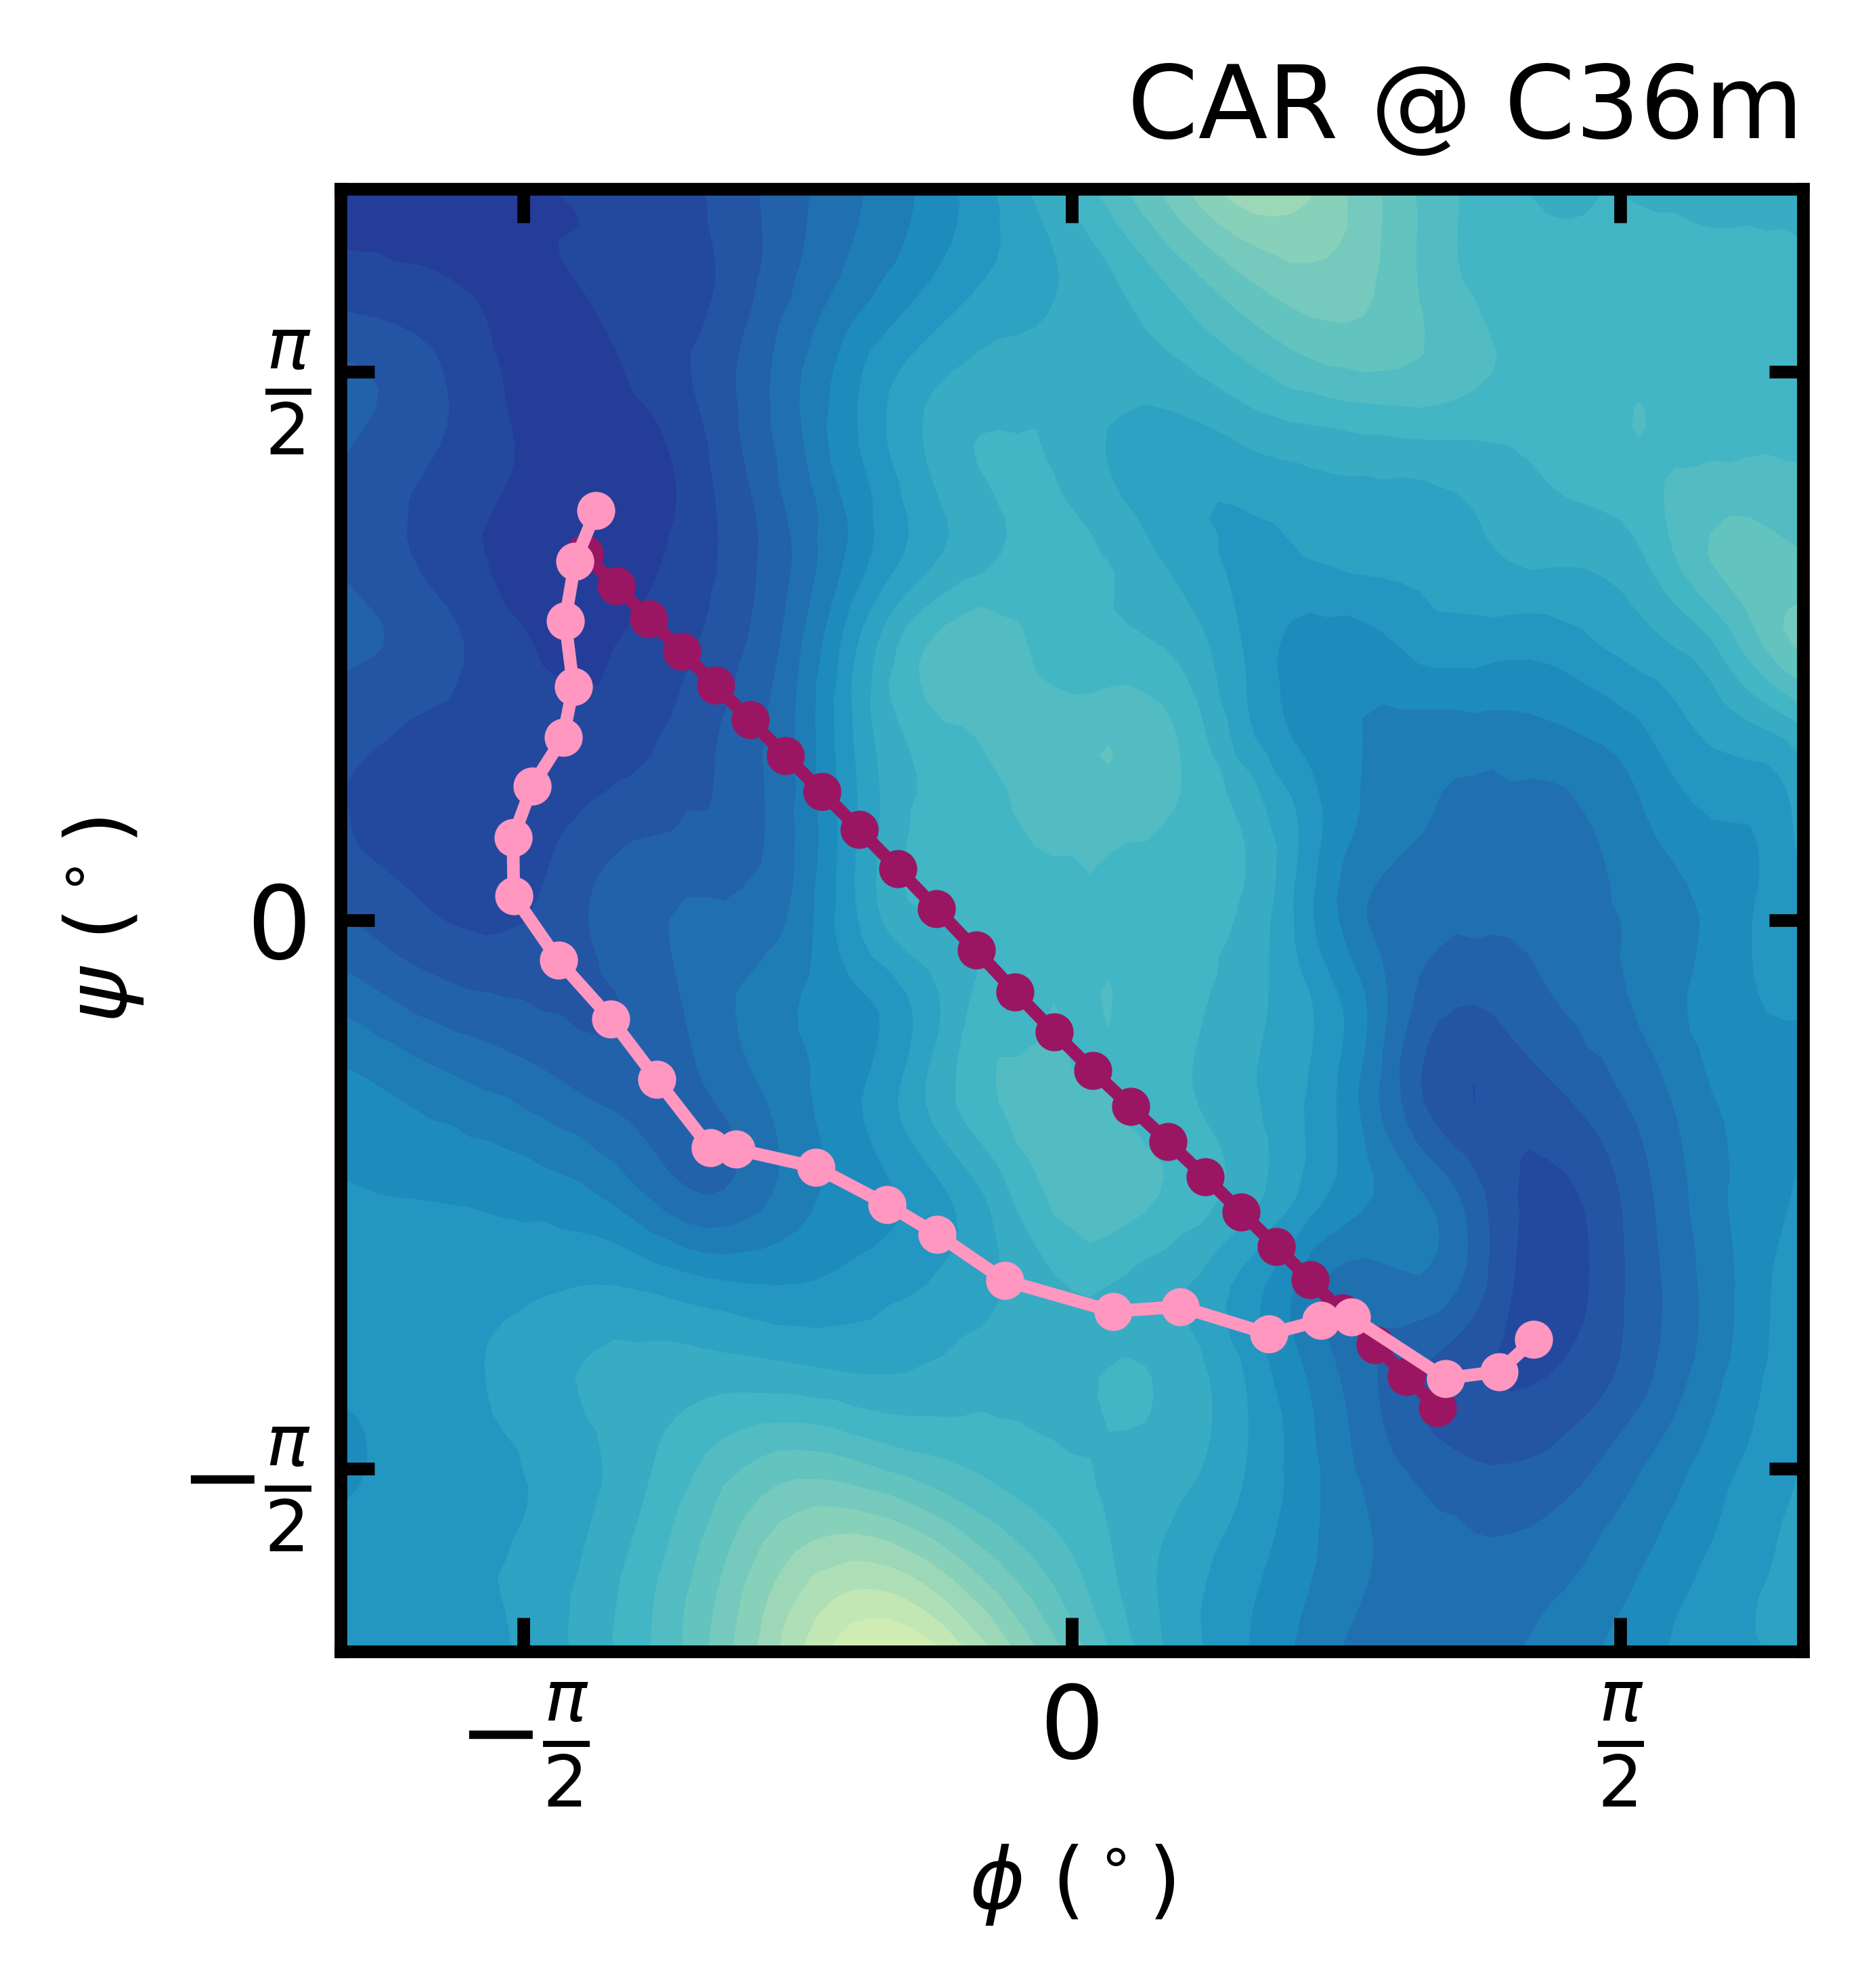

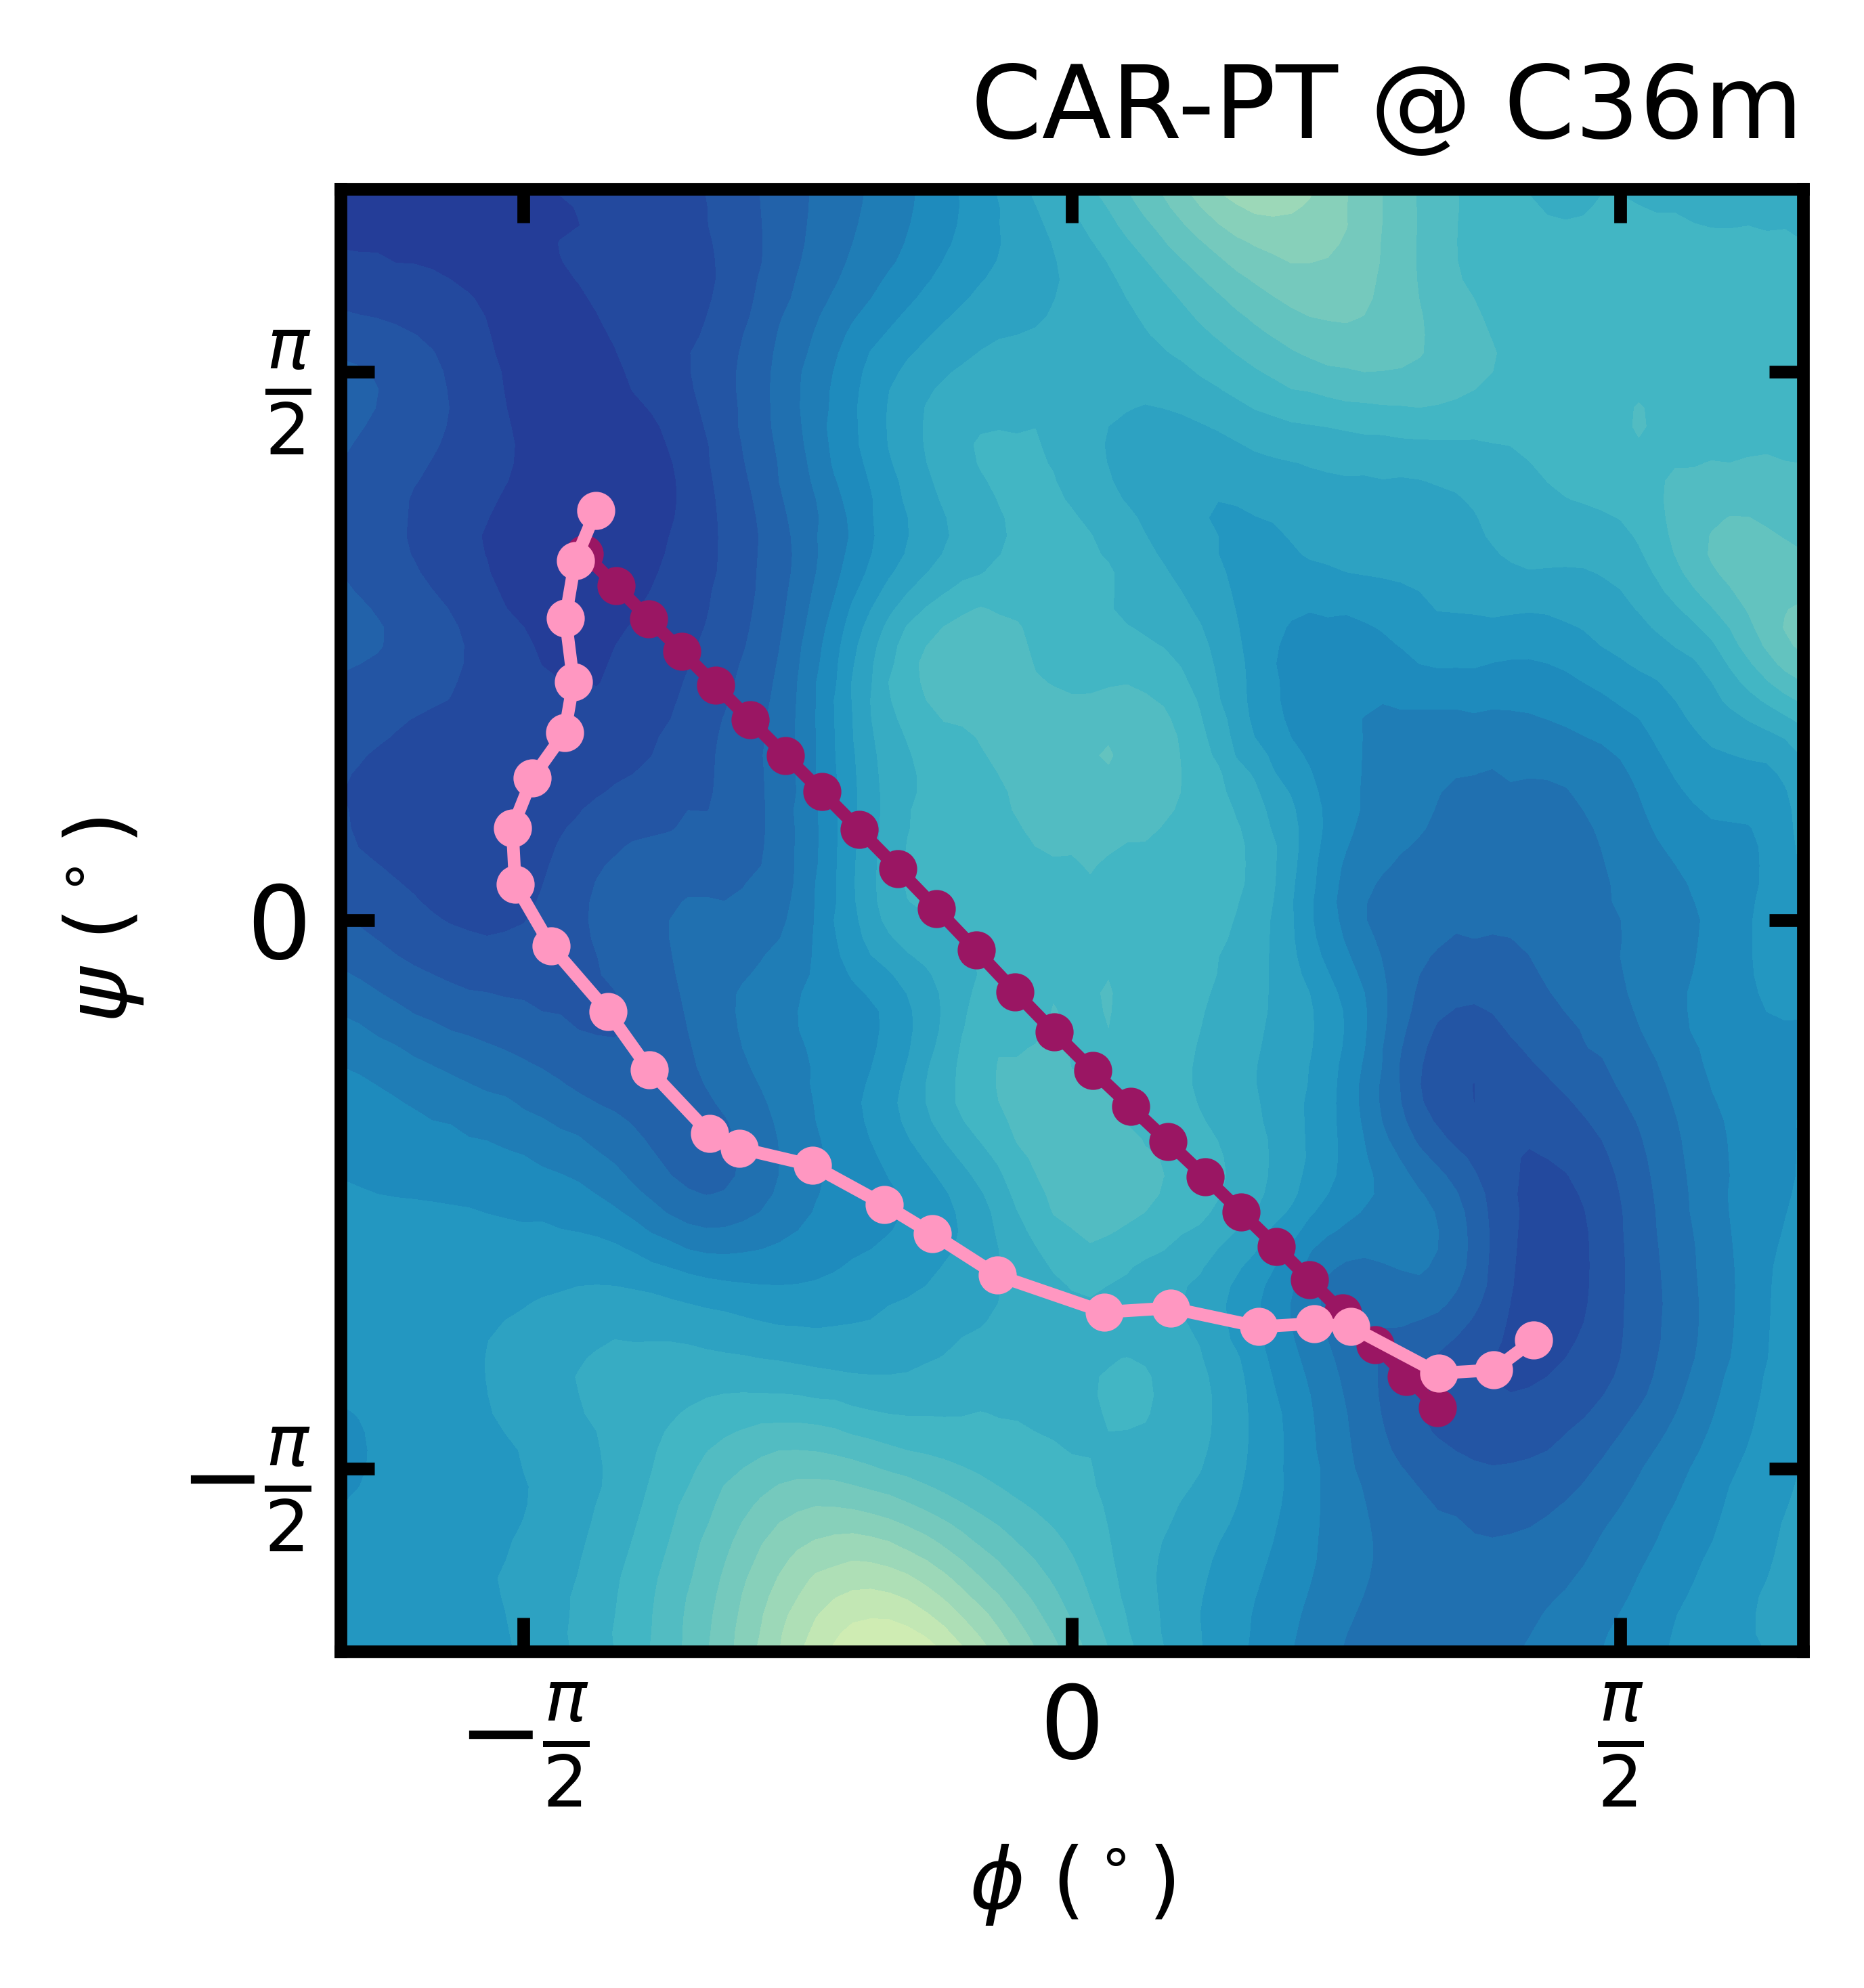

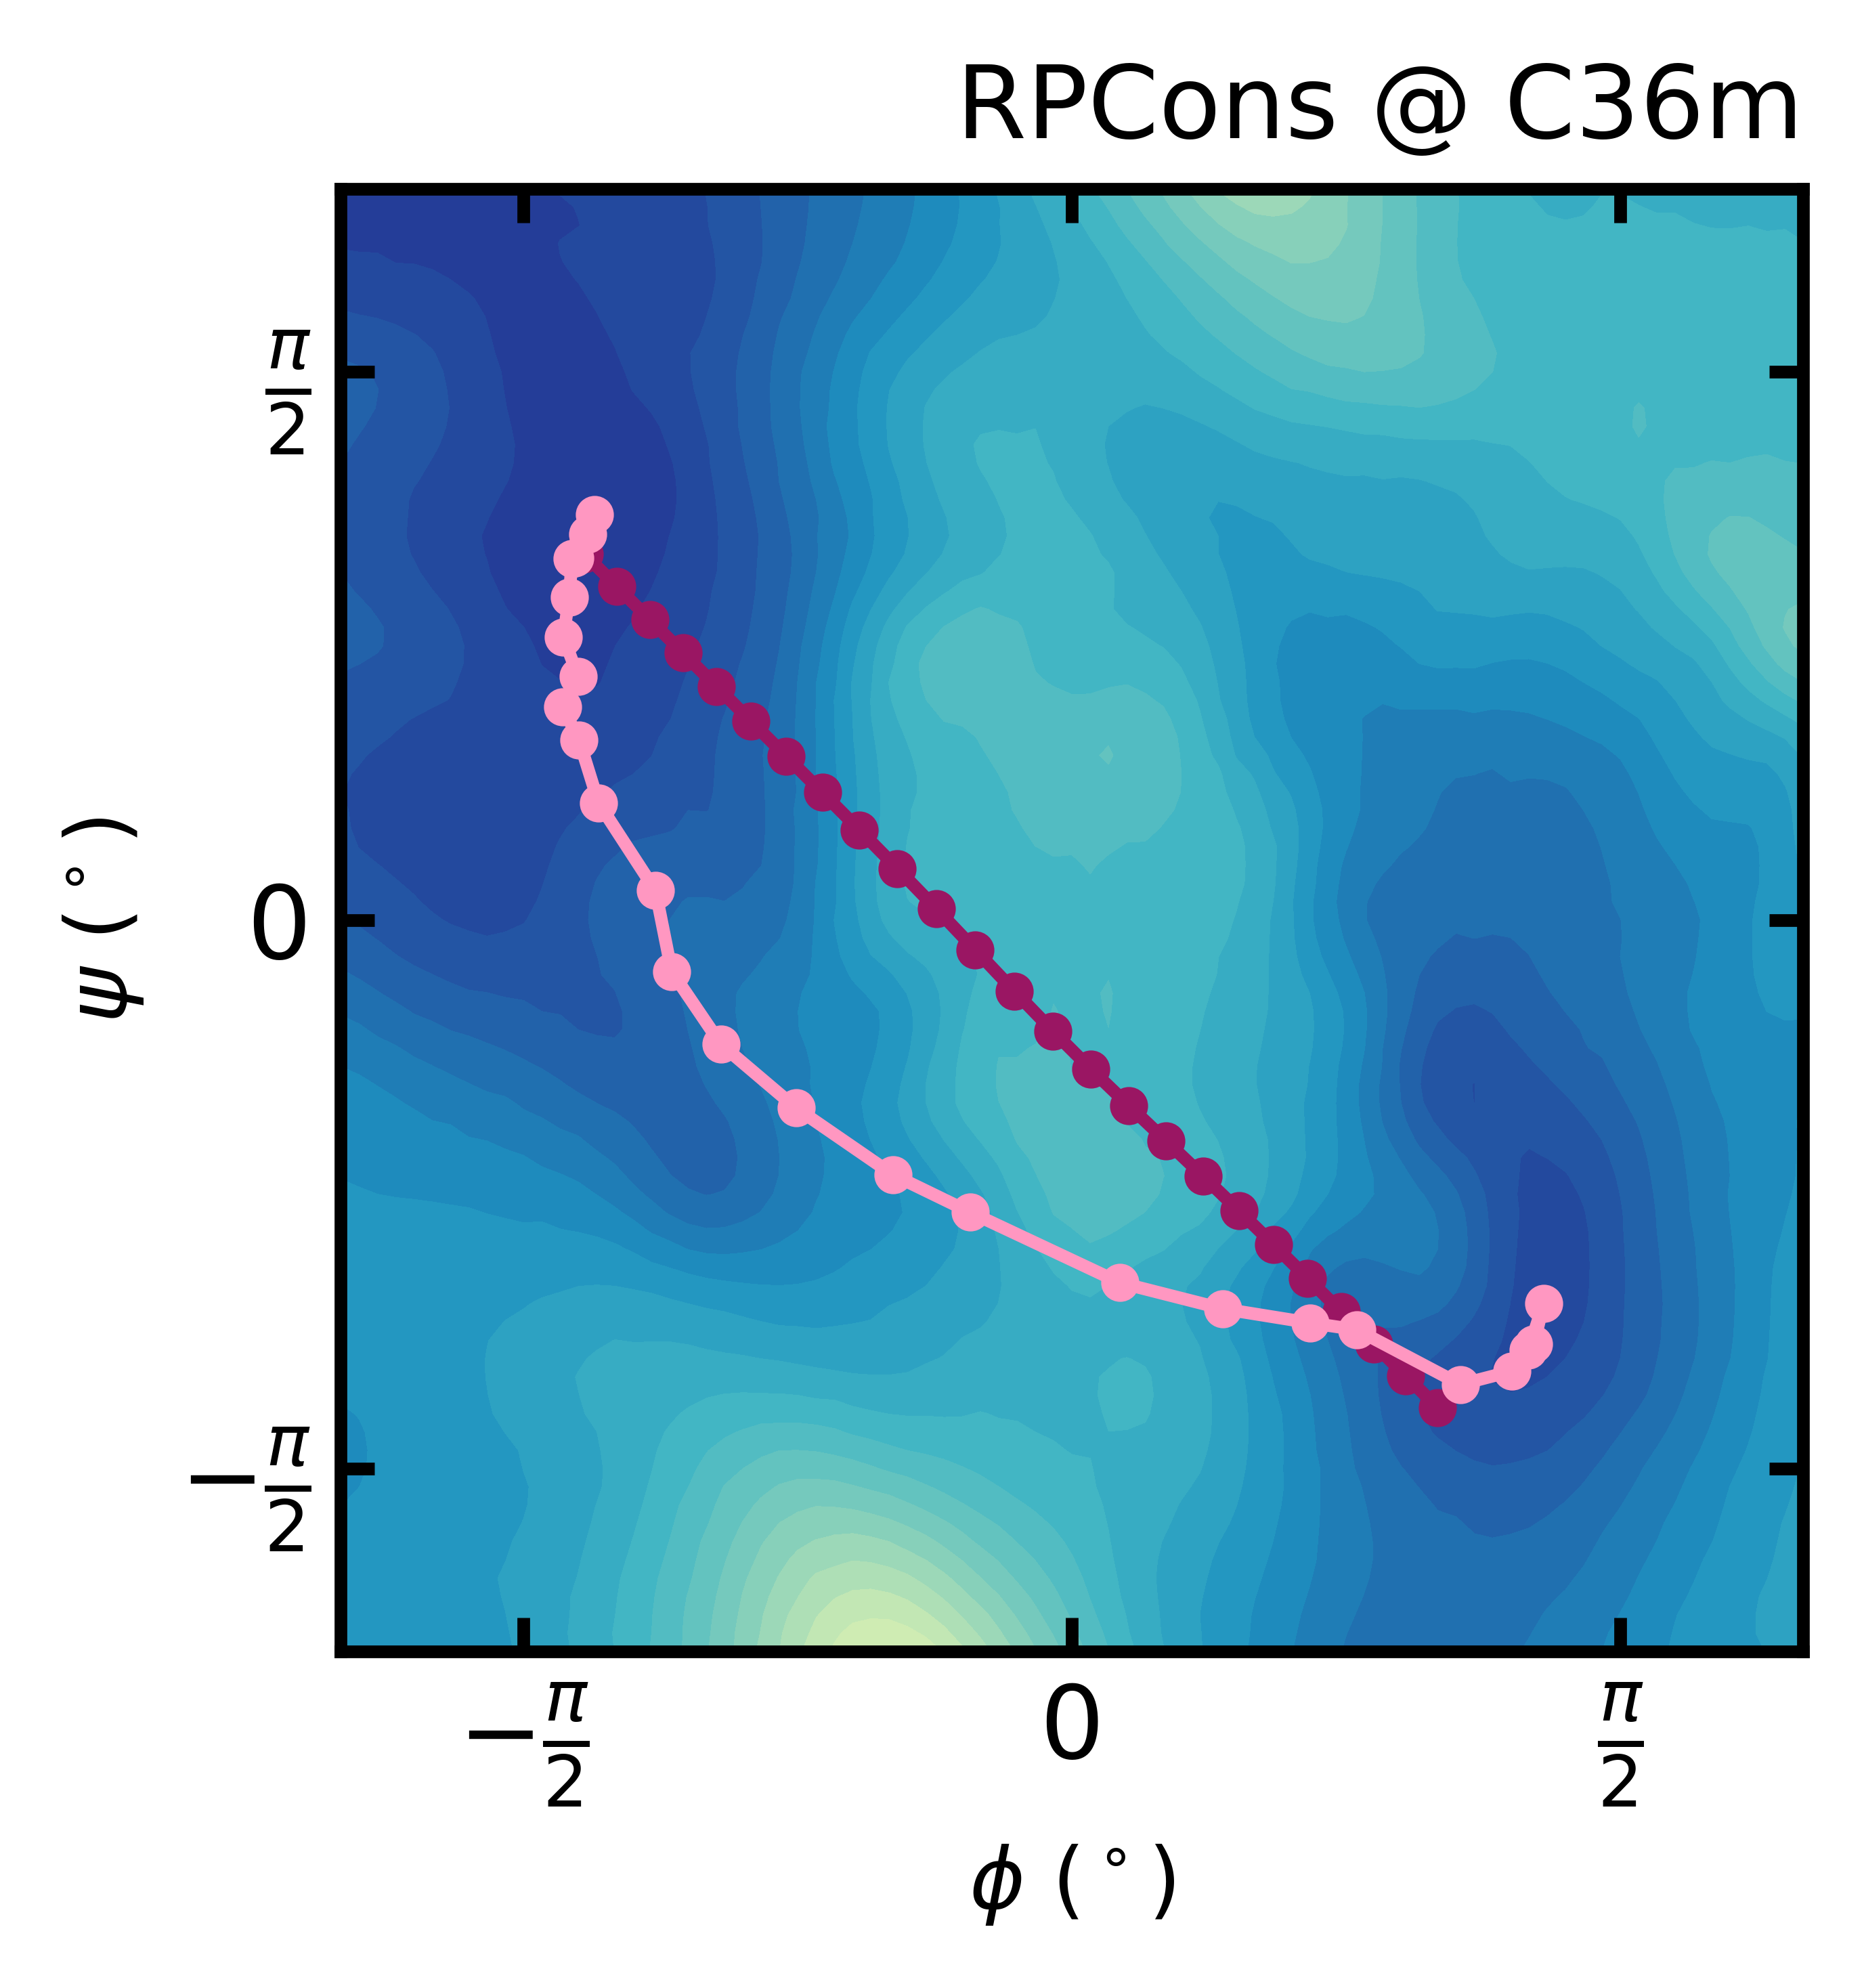

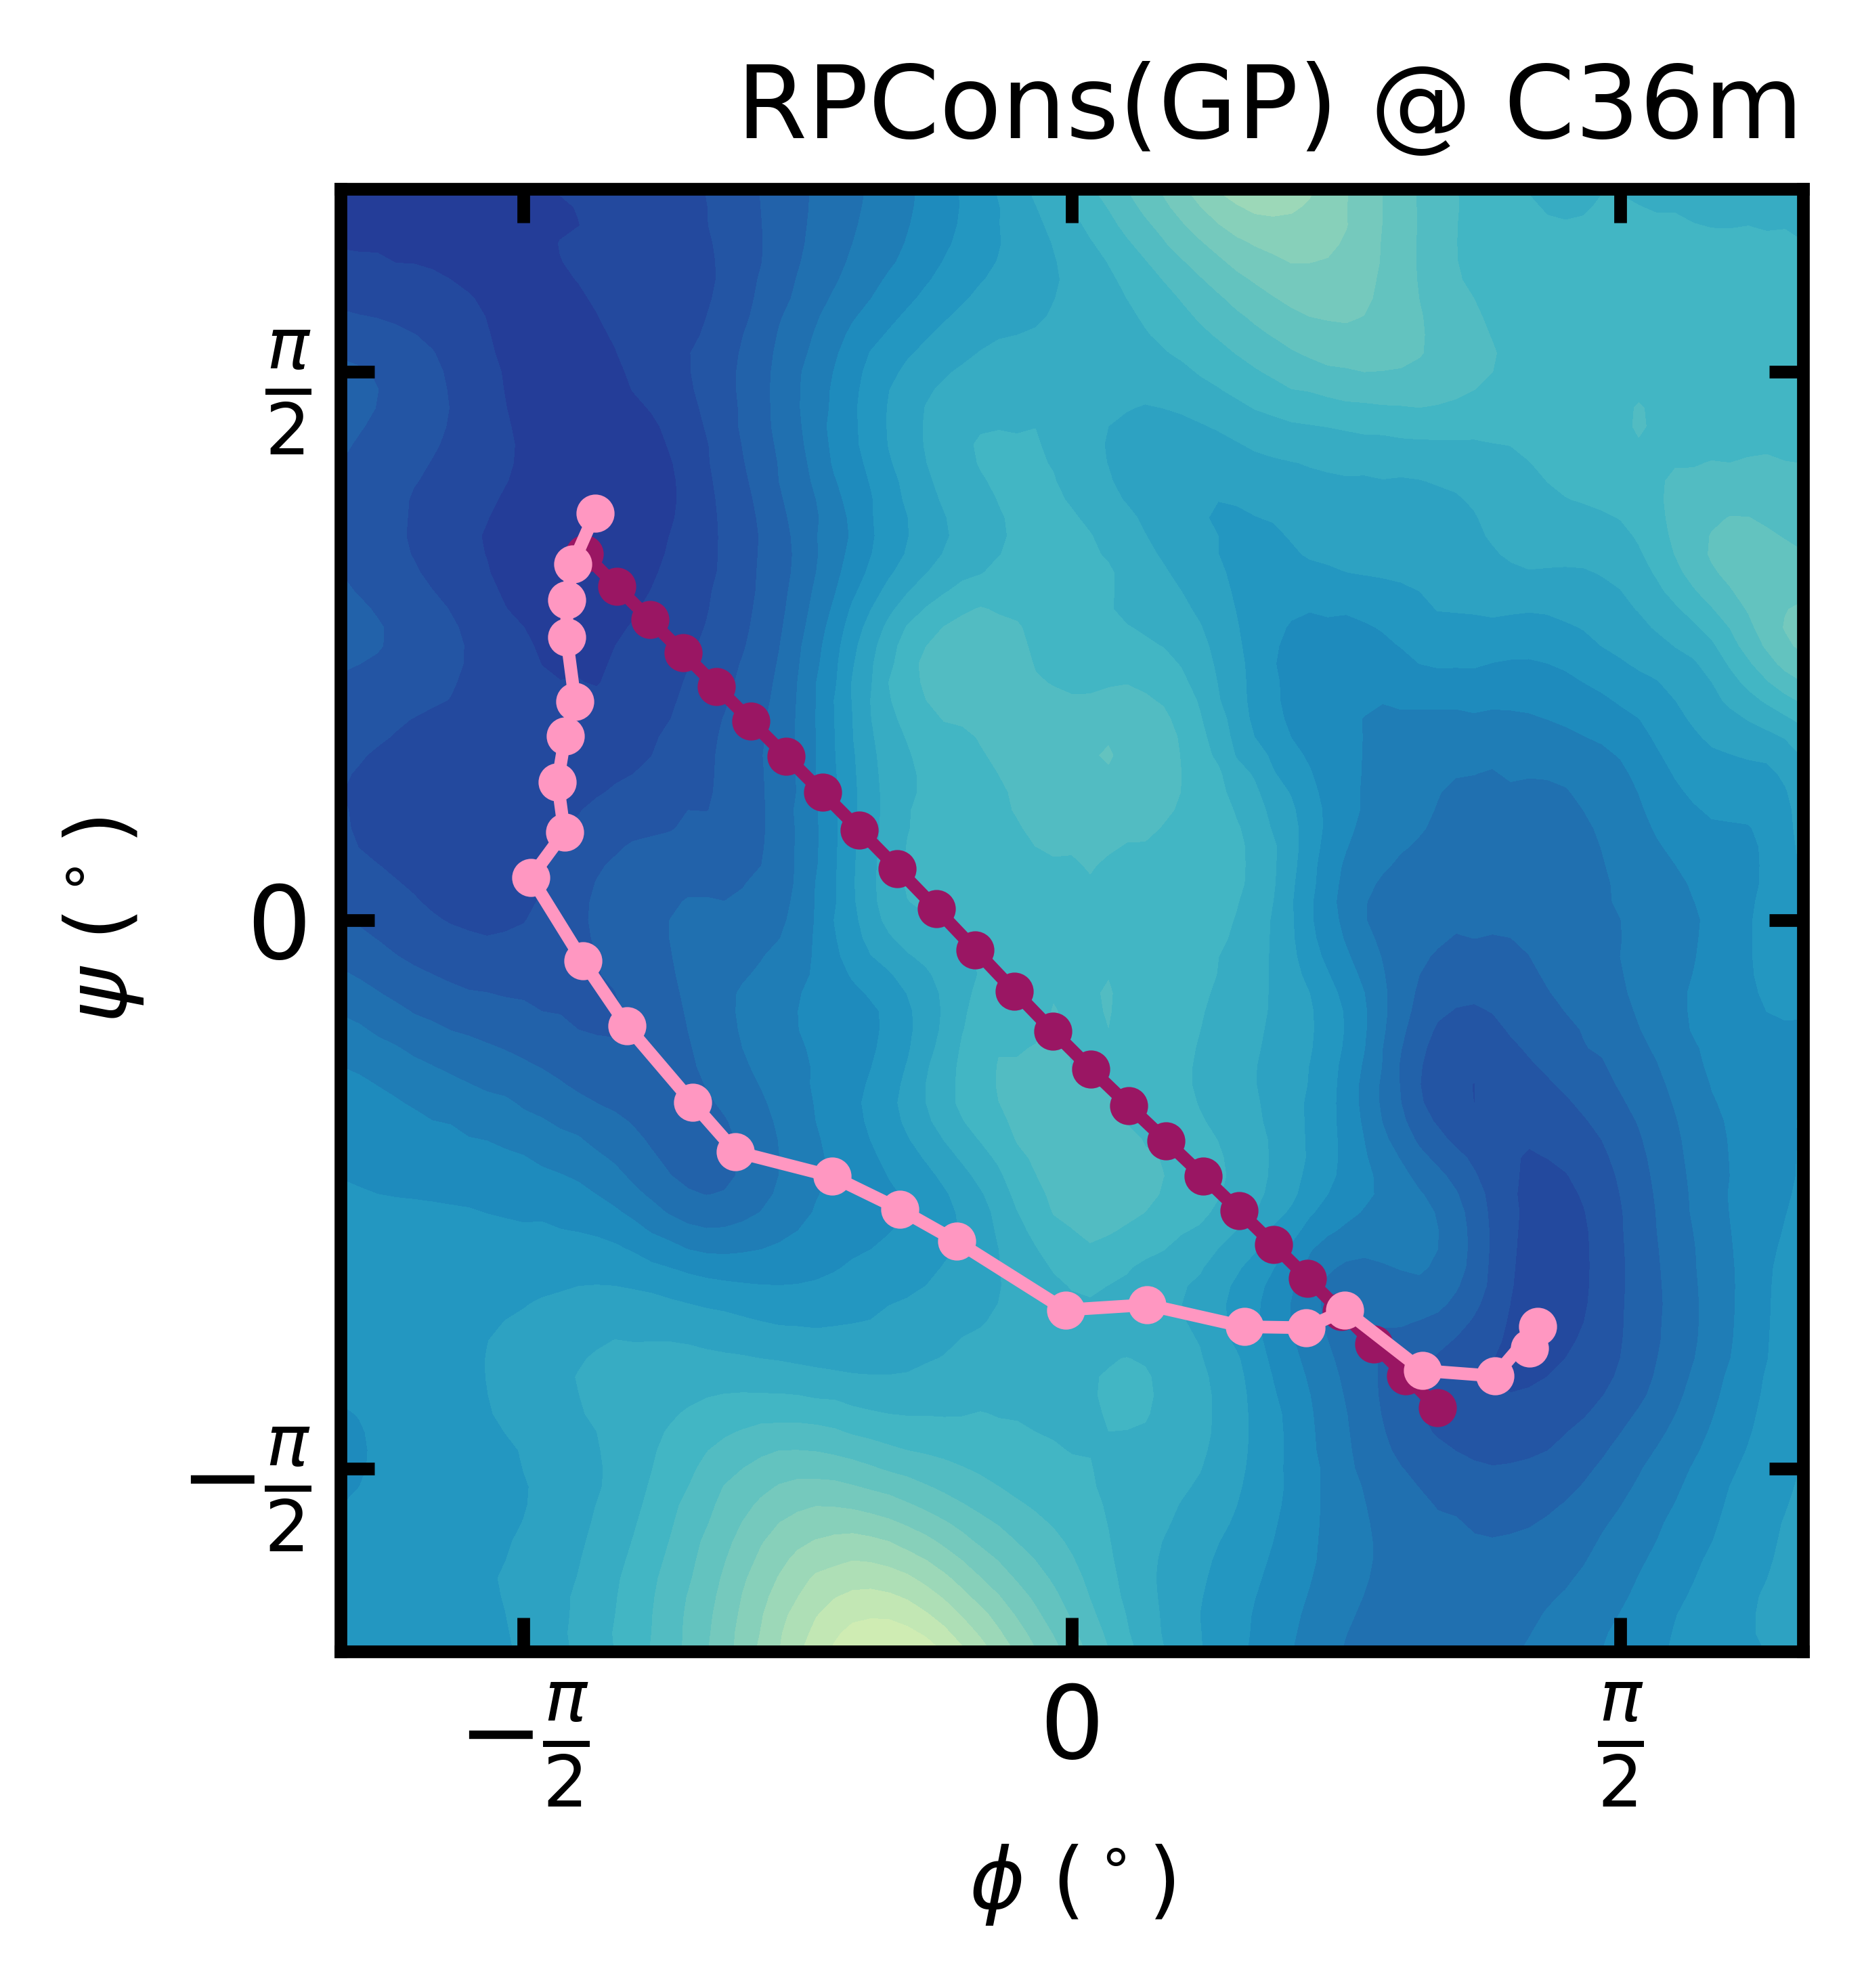

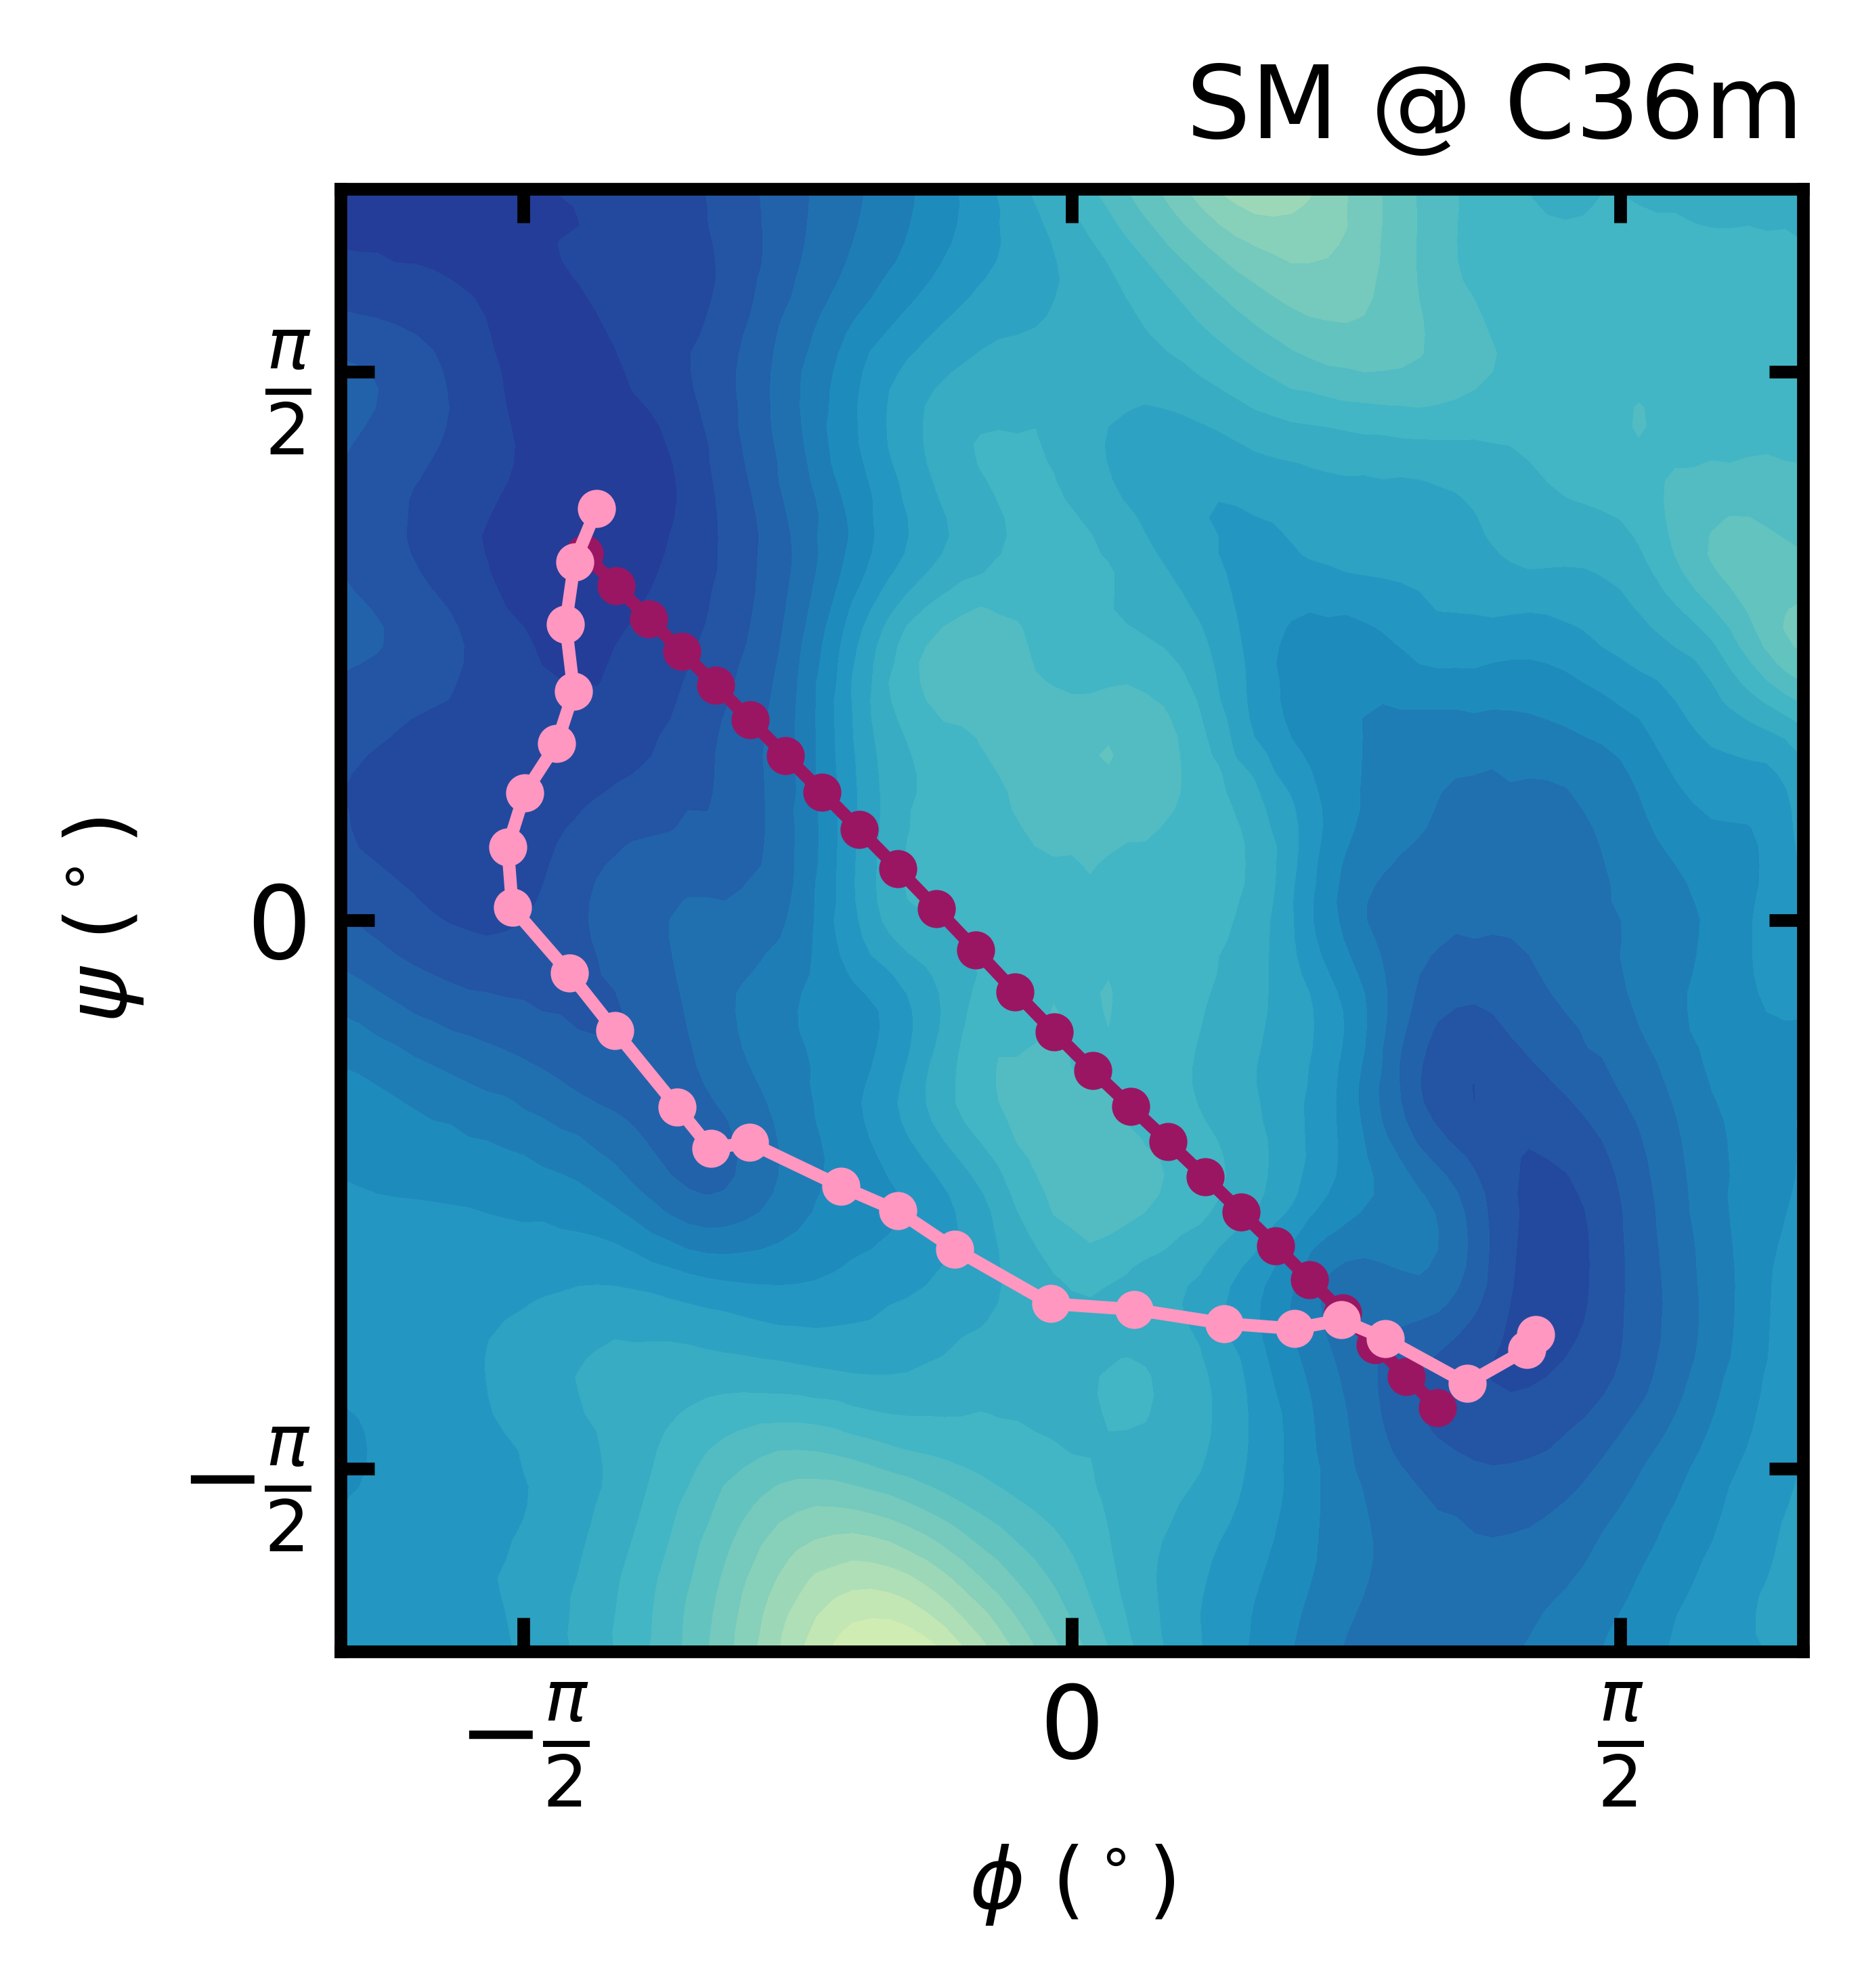

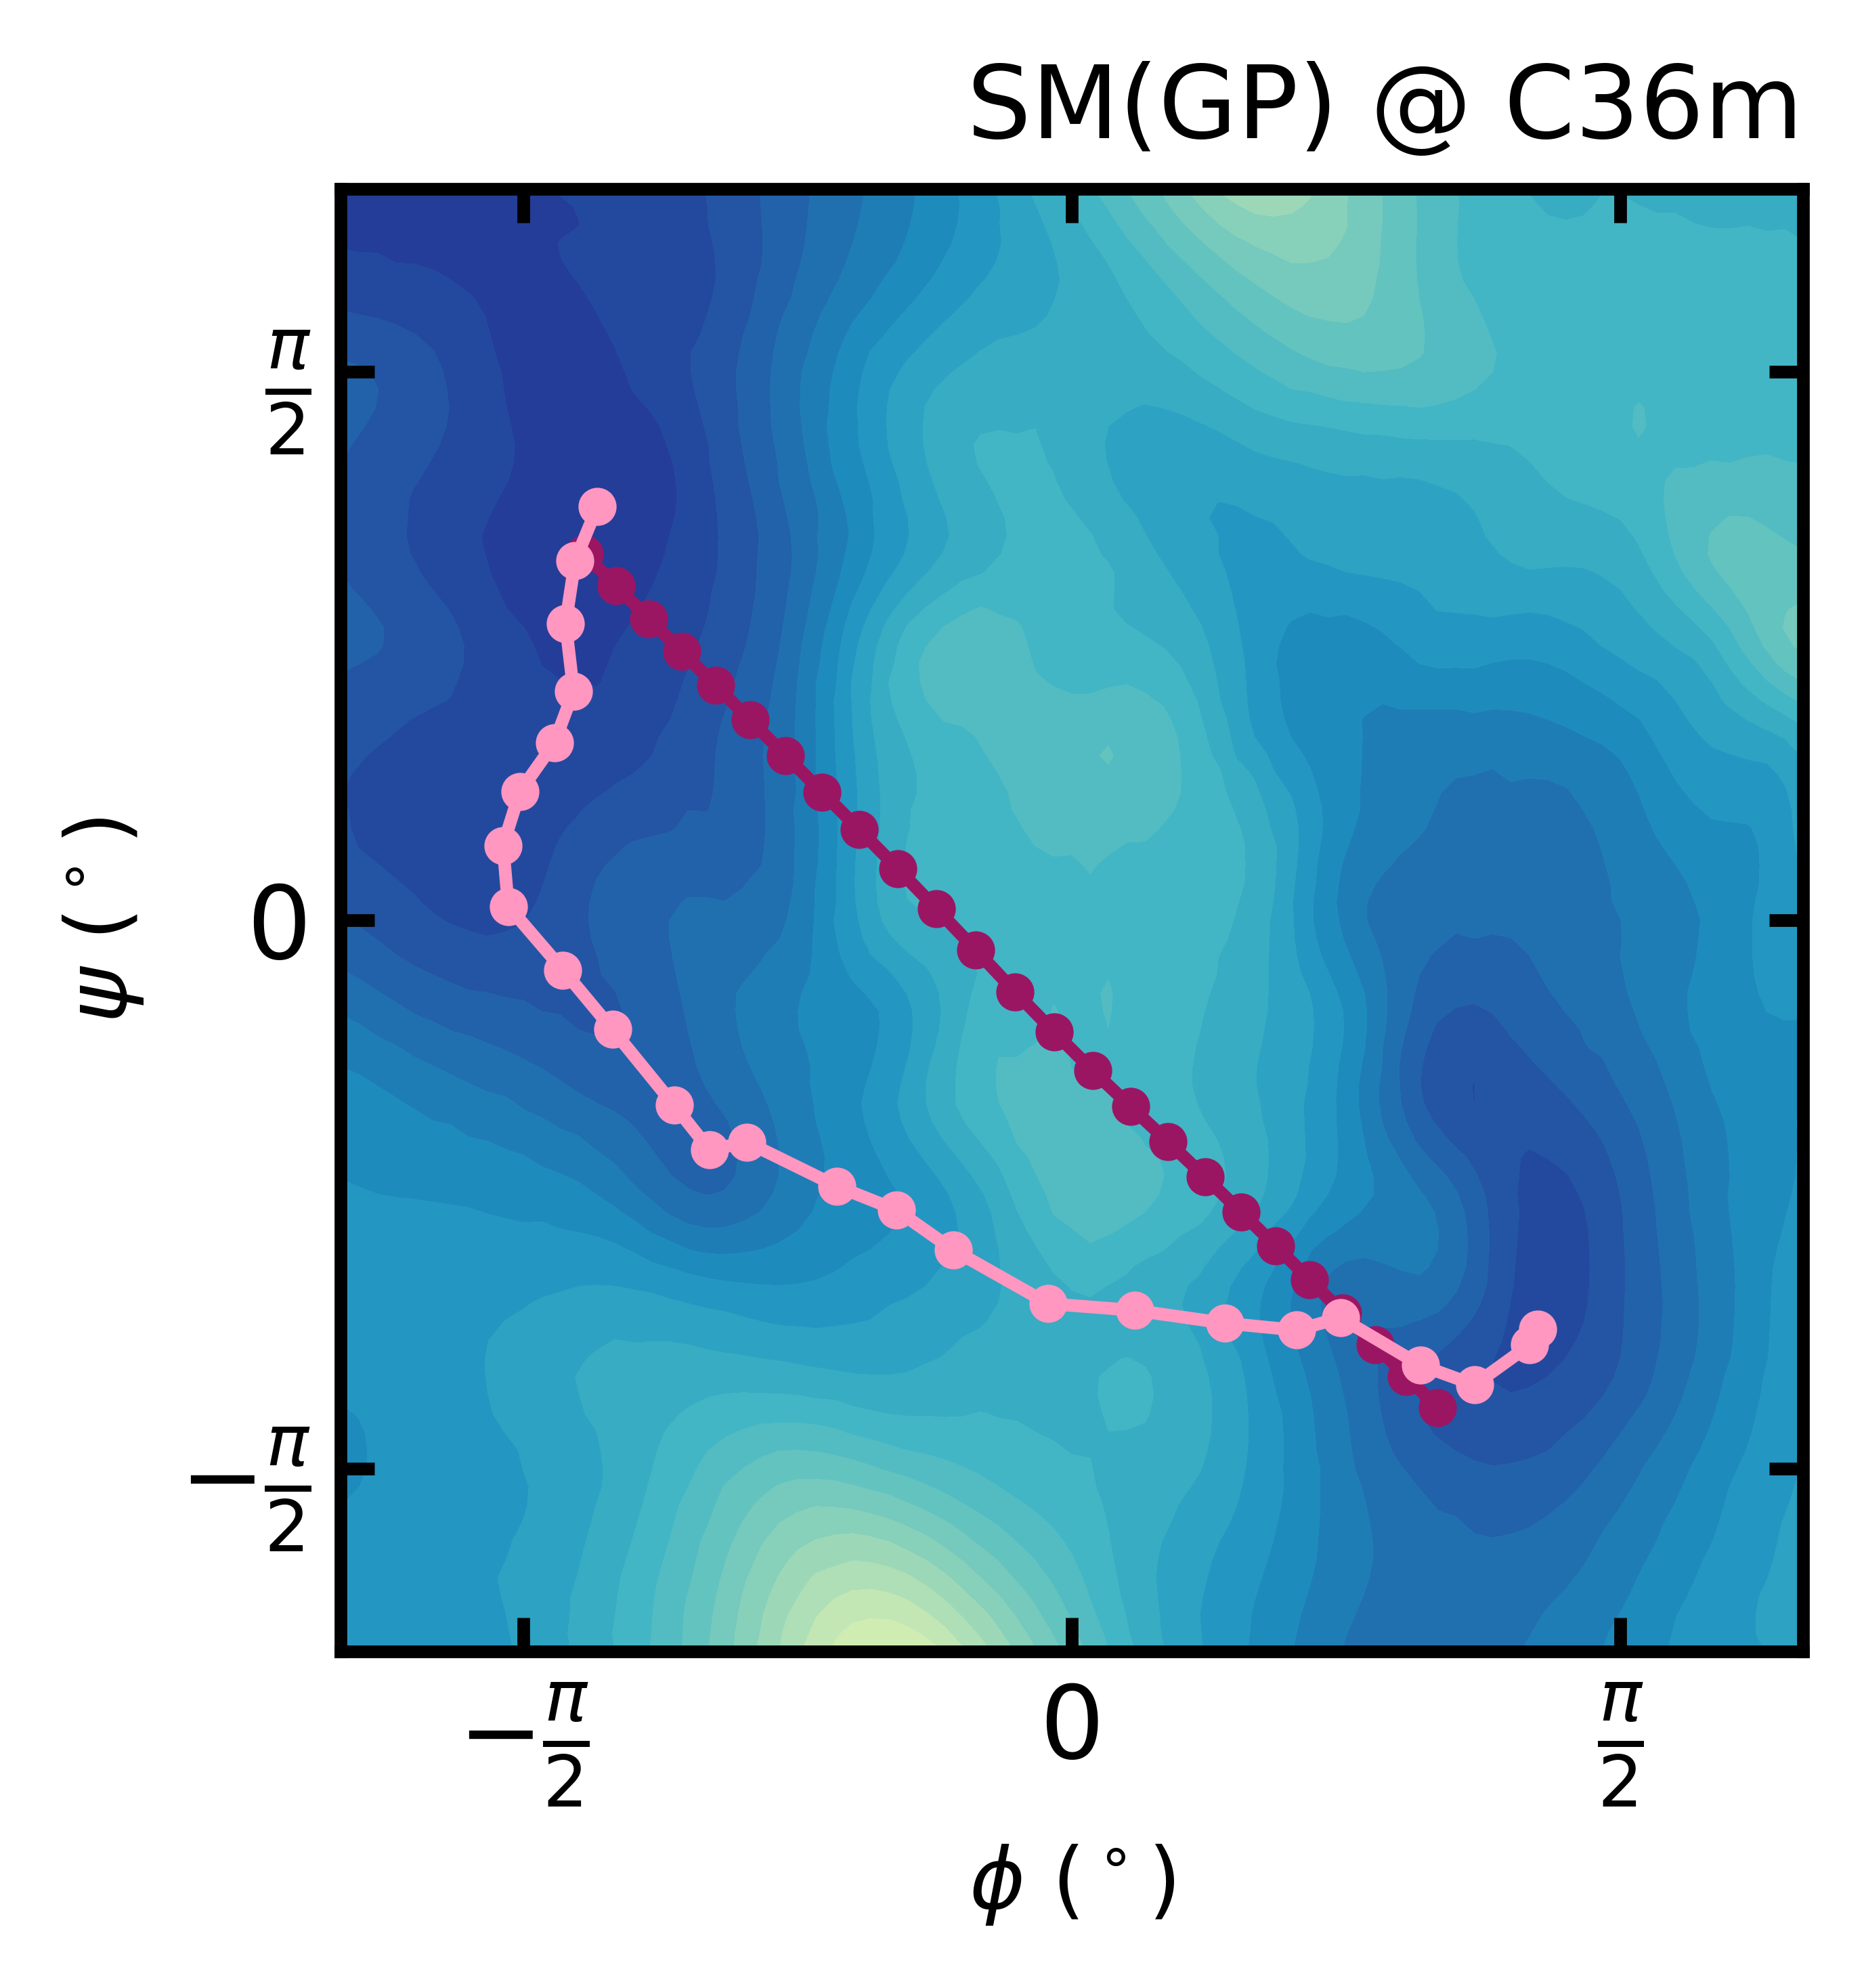

In [4]:
out_car   = load_all('car')
out_carpt = load_all('carpt')
out_rpc   = load_all('rpc')
out_rpcgp = load_all('rpcgp')
out_sm    = load_all('sm')
out_smgp  = load_all('smgp')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, out_car[0], out_car[1])
ax.set_title('CAR @ C36m', fontdict={'fontsize':12}, loc='right')

plt.savefig(f'{basedir}/../plot_diala_c36m_car.jpeg')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, out_carpt[0], out_carpt[1])
ax.set_title('CAR-PT @ C36m', fontdict={'fontsize':12}, loc='right')

plt.savefig(f'{basedir}/../plot_diala_c36m_carpt.jpeg')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, out_rpc[0], out_rpc[1])
ax.set_title('RPCons @ C36m', fontdict={'fontsize':12}, loc='right')

plt.savefig(f'{basedir}/../plot_diala_c36m_rpcons.jpeg')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, out_rpcgp[0], out_rpcgp[1])
ax.set_title('RPCons(GP) @ C36m', fontdict={'fontsize':12}, loc='right')

plt.savefig(f'{basedir}/../plot_diala_c36m_rpconsgp.jpeg')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax, out_sm[0], out_sm[1])
ax.set_title('SM @ C36m', fontdict={'fontsize':12}, loc='right')

plt.savefig(f'{basedir}/../plot_diala_c36m_sm.jpeg')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ax, v = plot_cvec(ax,  out_smgp[0],  out_smgp[1])
ax.set_title('SM(GP) @ C36m', fontdict={'fontsize':12}, loc='right')

plt.savefig(f'{basedir}/../plot_diala_c36m_smgp.jpeg')

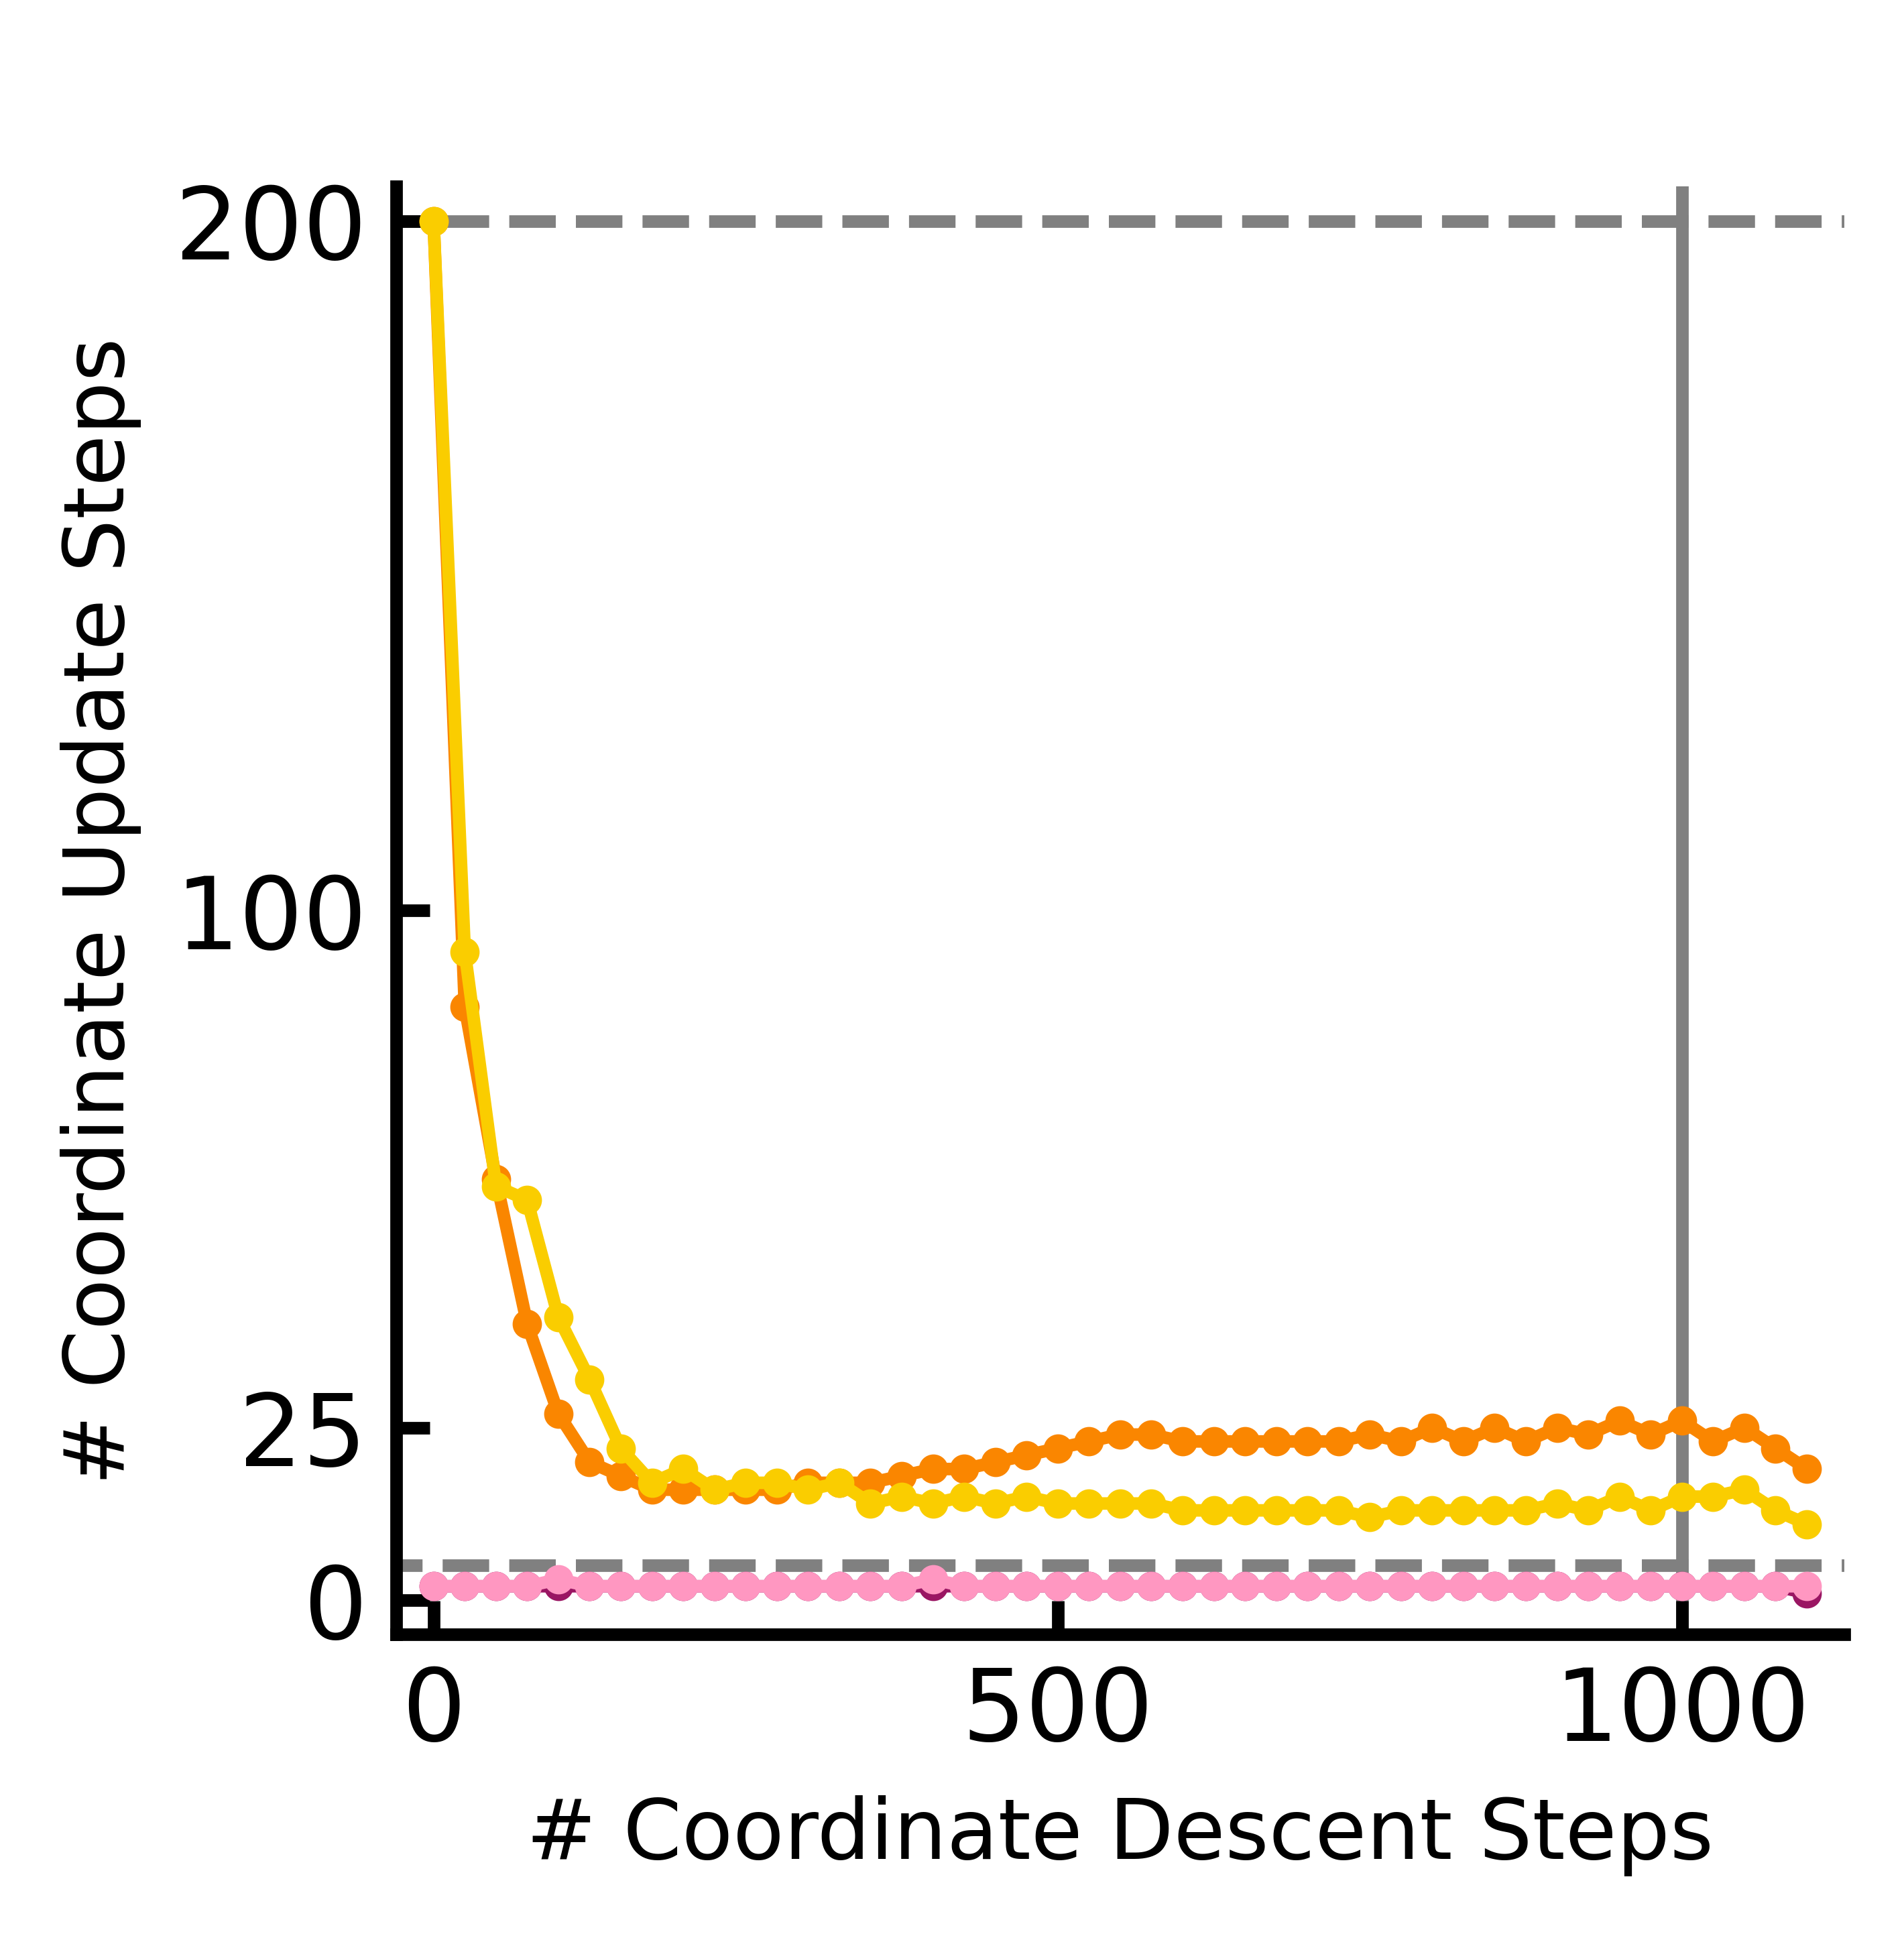

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=900)
plt.subplots_adjust(left=1./5., right=3.4/5., top=3.4/4., bottom=1./4.)

ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(" ")

# Fig. iterative update counts
ax.plot([-100, 1200], [200,200], 'gray', ls='--',  lw=1.5, zorder=0)
ax.plot([-100, 1200], [  5,  5], 'gray', ls='--', lw=1.5, zorder=0)
ax.plot([1000, 1000], [-10,500], 'gray', ls='-', lw=1.5, zorder=0)

x = numpy.concatenate((numpy.arange(len(out_car  [-1]))[::25], [numpy.arange(len(out_car  [-1]))[::25][-1]+25]))

y_out_car   = numpy.concatenate((out_car  [-1][0::25], [out_car  [-1][-1]]))
y_out_carpt = numpy.concatenate((out_carpt[-1][0::25], [out_carpt[-1][-1]]))
y_out_rpc   = numpy.concatenate((out_rpc  [-1][0::25], [out_rpc  [-1][-1]]))
y_out_rpcgp = numpy.concatenate((out_rpcgp[-1][0::25], [out_rpcgp[-1][-1]]))

ax.plot(x, y_out_car  , color="#9A1663", marker='.', markersize=5, label='CAR')
ax.plot(x, y_out_carpt, color="#FF97C1", marker='.', markersize=5, label='CAR-PT')
ax.plot(x, y_out_rpc  , color="#FA8600", marker='.', markersize=5, label='RPCons')
ax.plot(x, y_out_rpcgp, color="#FACD00", marker='.', markersize=5, label='RPCons(GP)')

ax.set(xlim=(-30, 1130),
       ylim=(-5, 205),   yticks=[0, 25, 100, 200])
ax.set_ylabel('# Coordinate Update Steps')
ax.set_xlabel('# Coordinate Descent Steps')

plt.savefig(f'{basedir}/../plot_diala_c36m_itr_traj.jpeg')

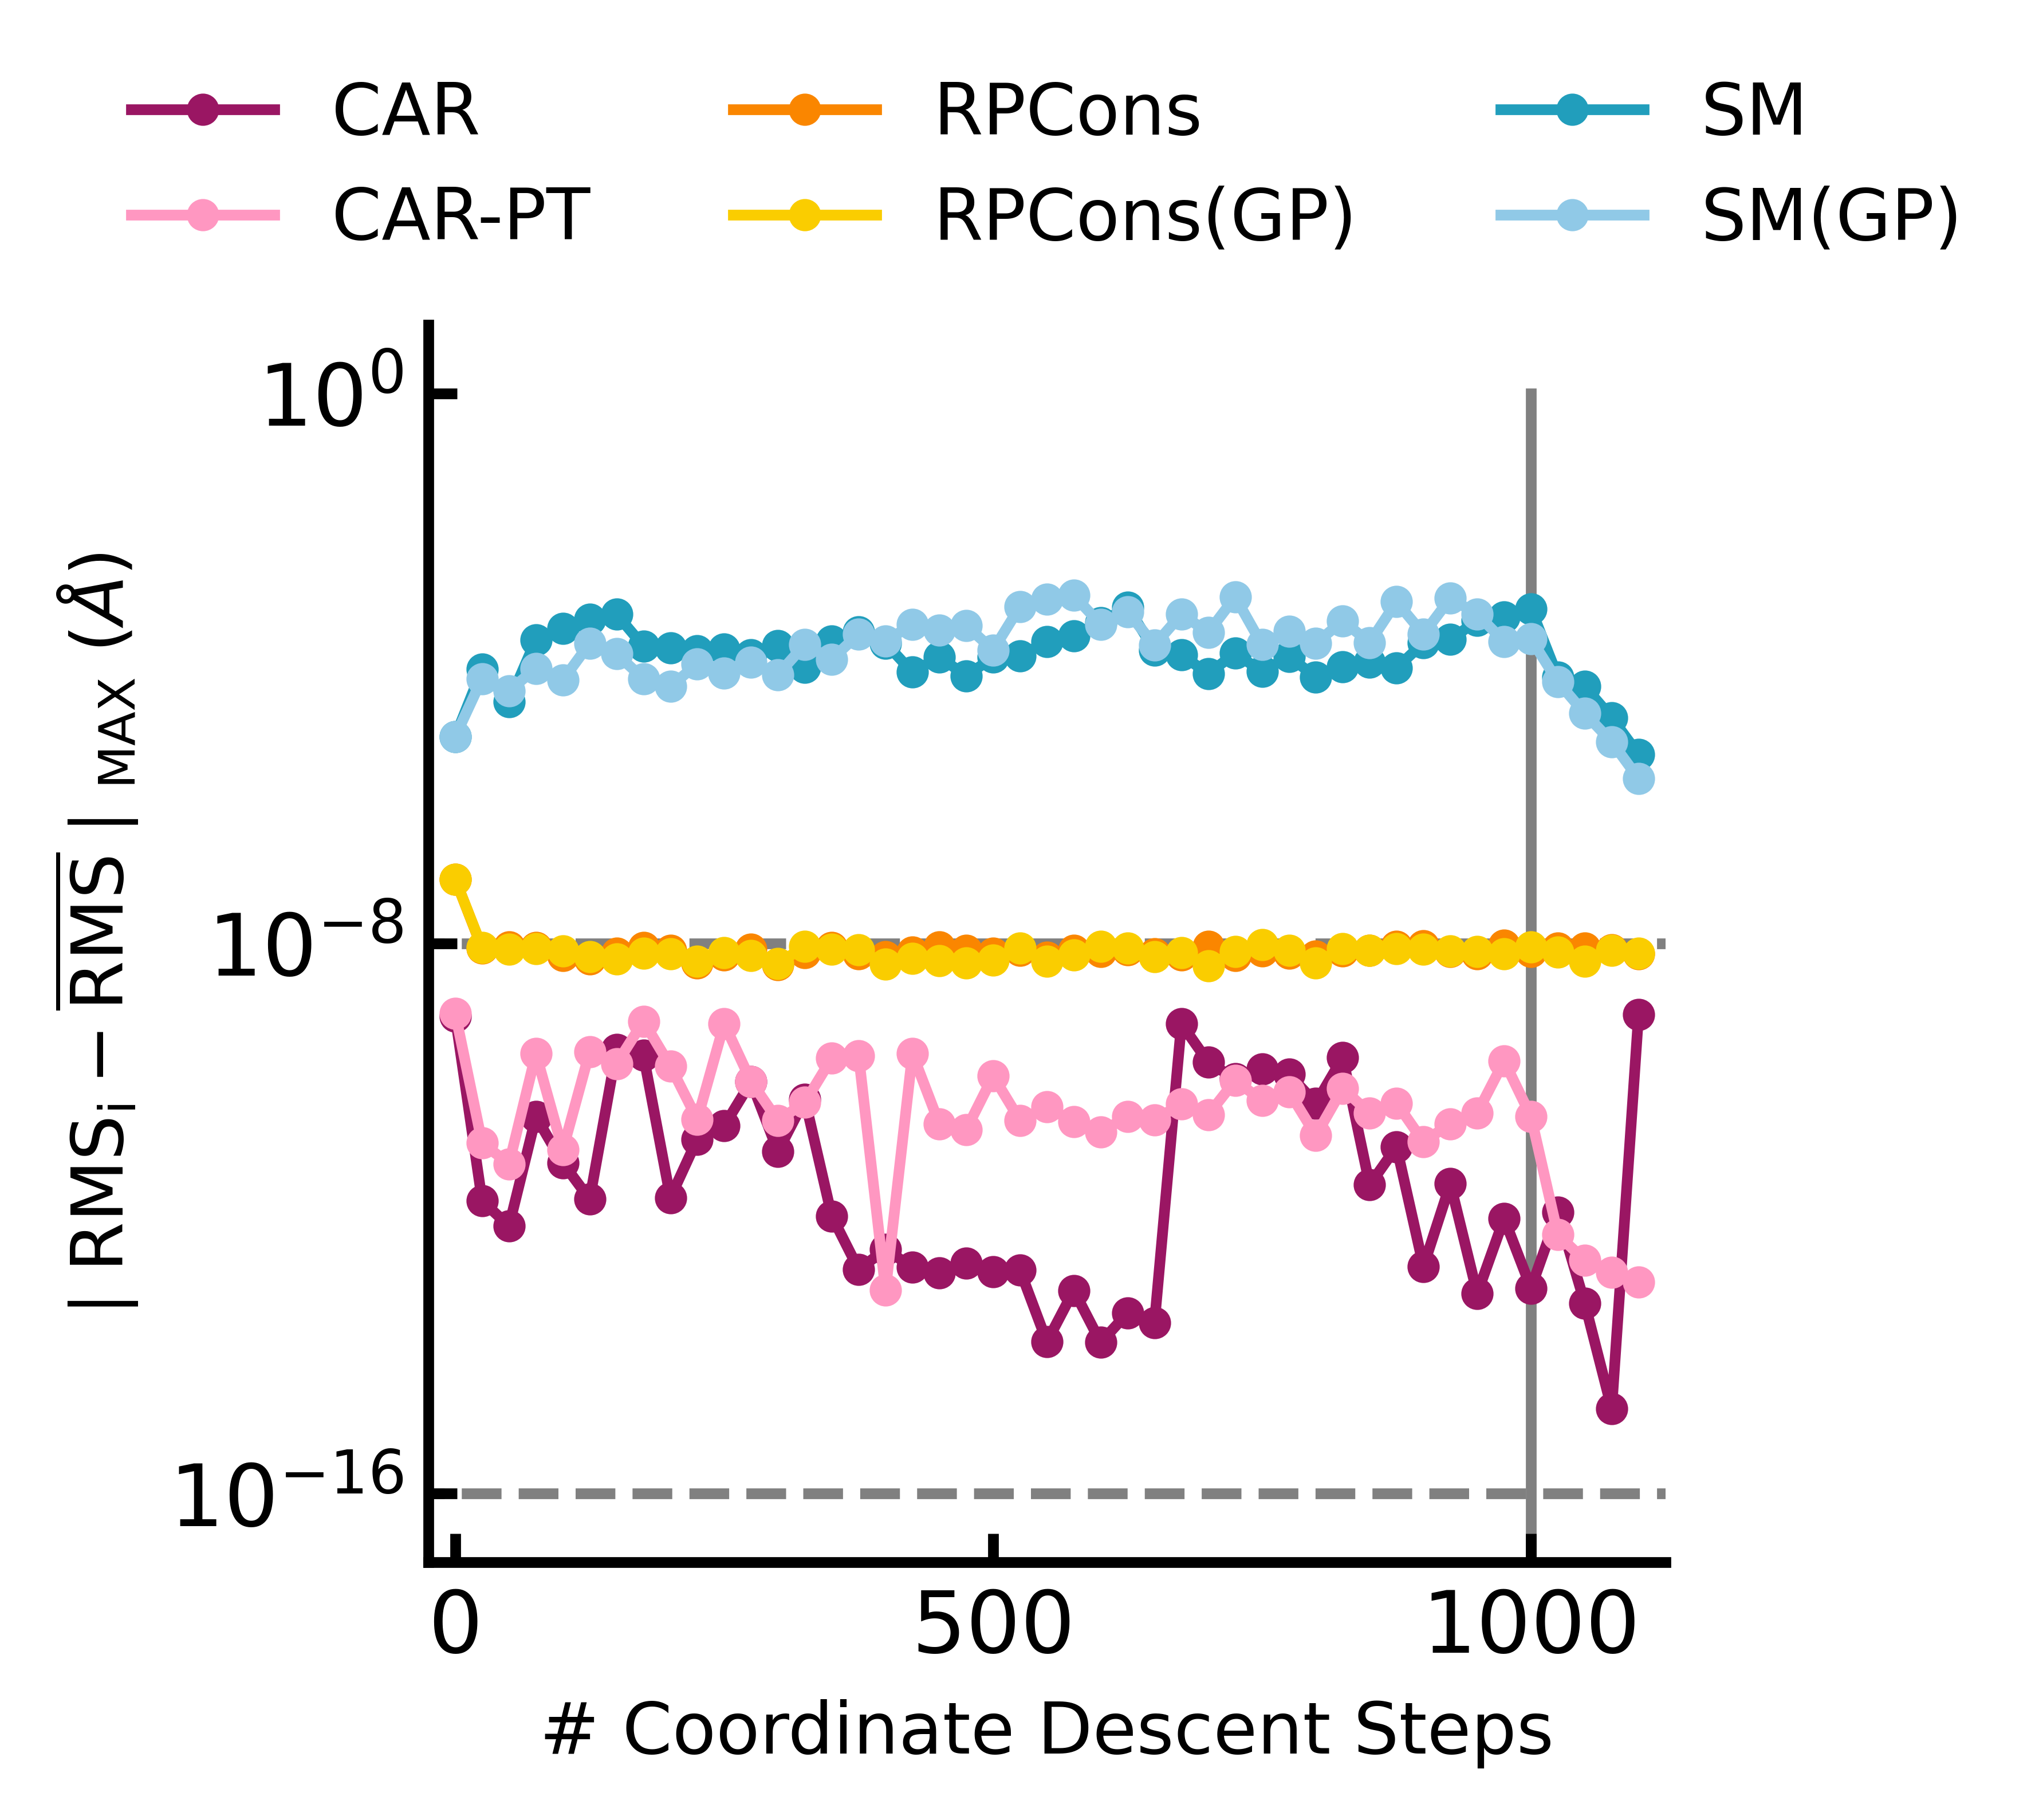

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4.5), dpi=900)
plt.subplots_adjust(left=1./4., right=3.4/4., top=3.4/4.5, bottom=1./4.5)

ax.tick_params(direction='in', width=1.5, length=4, labelsize=12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title(" ")

ax.plot([-100, 1300], [ 1e-8, 1e-8 ], 'gray', ls='--',  lw=1.5, zorder=0)
ax.plot([-100, 1300], [1e-16, 1e-16], 'gray', ls='--', lw=1.5, zorder=0)
ax.plot([1000, 1000], [   -1,     1], 'gray', ls='-',  lw=1.5, zorder=0)

x = numpy.concatenate((numpy.arange(len(out_car  [-2]))[::25], [numpy.arange(len(out_car  [-1]))[::25][-1]+25]))

y_out_car   = numpy.concatenate((out_car  [-2][0::25], [out_car  [-2][-1]]))
y_out_carpt = numpy.concatenate((out_carpt[-2][0::25], [out_carpt[-2][-1]]))
y_out_rpc   = numpy.concatenate((out_rpc  [-2][0::25], [out_rpc  [-2][-1]]))
y_out_rpcgp = numpy.concatenate((out_rpcgp[-2][0::25], [out_rpcgp[-2][-1]]))
y_out_sm    = numpy.concatenate((out_sm   [-1][0::25], [out_sm   [-1][-1]]))
y_out_smgp  = numpy.concatenate((out_smgp [-1][0::25], [out_smgp [-1][-1]]))

ax.plot(x, y_out_car  , marker='.', markersize=7, color="#9A1663", label='CAR')
ax.plot(x, y_out_carpt, marker='.', markersize=7, color="#FF97C1", label='CAR-PT')
ax.plot(x, y_out_rpc  , marker='.', markersize=7, color="#FA8600", label='RPCons')
ax.plot(x, y_out_rpcgp, marker='.', markersize=7, color="#FACD00", label='RPCons(GP)')
ax.plot(x, y_out_sm   , marker='.', markersize=7, color="#219EBC", label='SM')
ax.plot(x, y_out_smgp , marker='.', markersize=7, color="#90C9E7", label='SM(GP)')

ax.set(xlim=(-25, 1125) , 
       ylim=(1e-17, 10.), yscale='log', yticks=[1e-16, 1e-8, 1])
ax.set_xlabel('# Coordinate Descent Steps')
ax.set_ylabel(r'$\mathrm{\mid RMS_{i}-\overline{RMS}\mid_{MAX}}$ ($\AA$)')
ax.legend(loc="upper left", bbox_to_anchor=(1., 1.), frameon=False)

leg = plt.legend(loc="upper center", bbox_to_anchor=(.5, 1.25), frameon=False, ncol=3, )

plt.savefig(f'{basedir}/../plot_diala_c36m_rms_traj.jpeg')


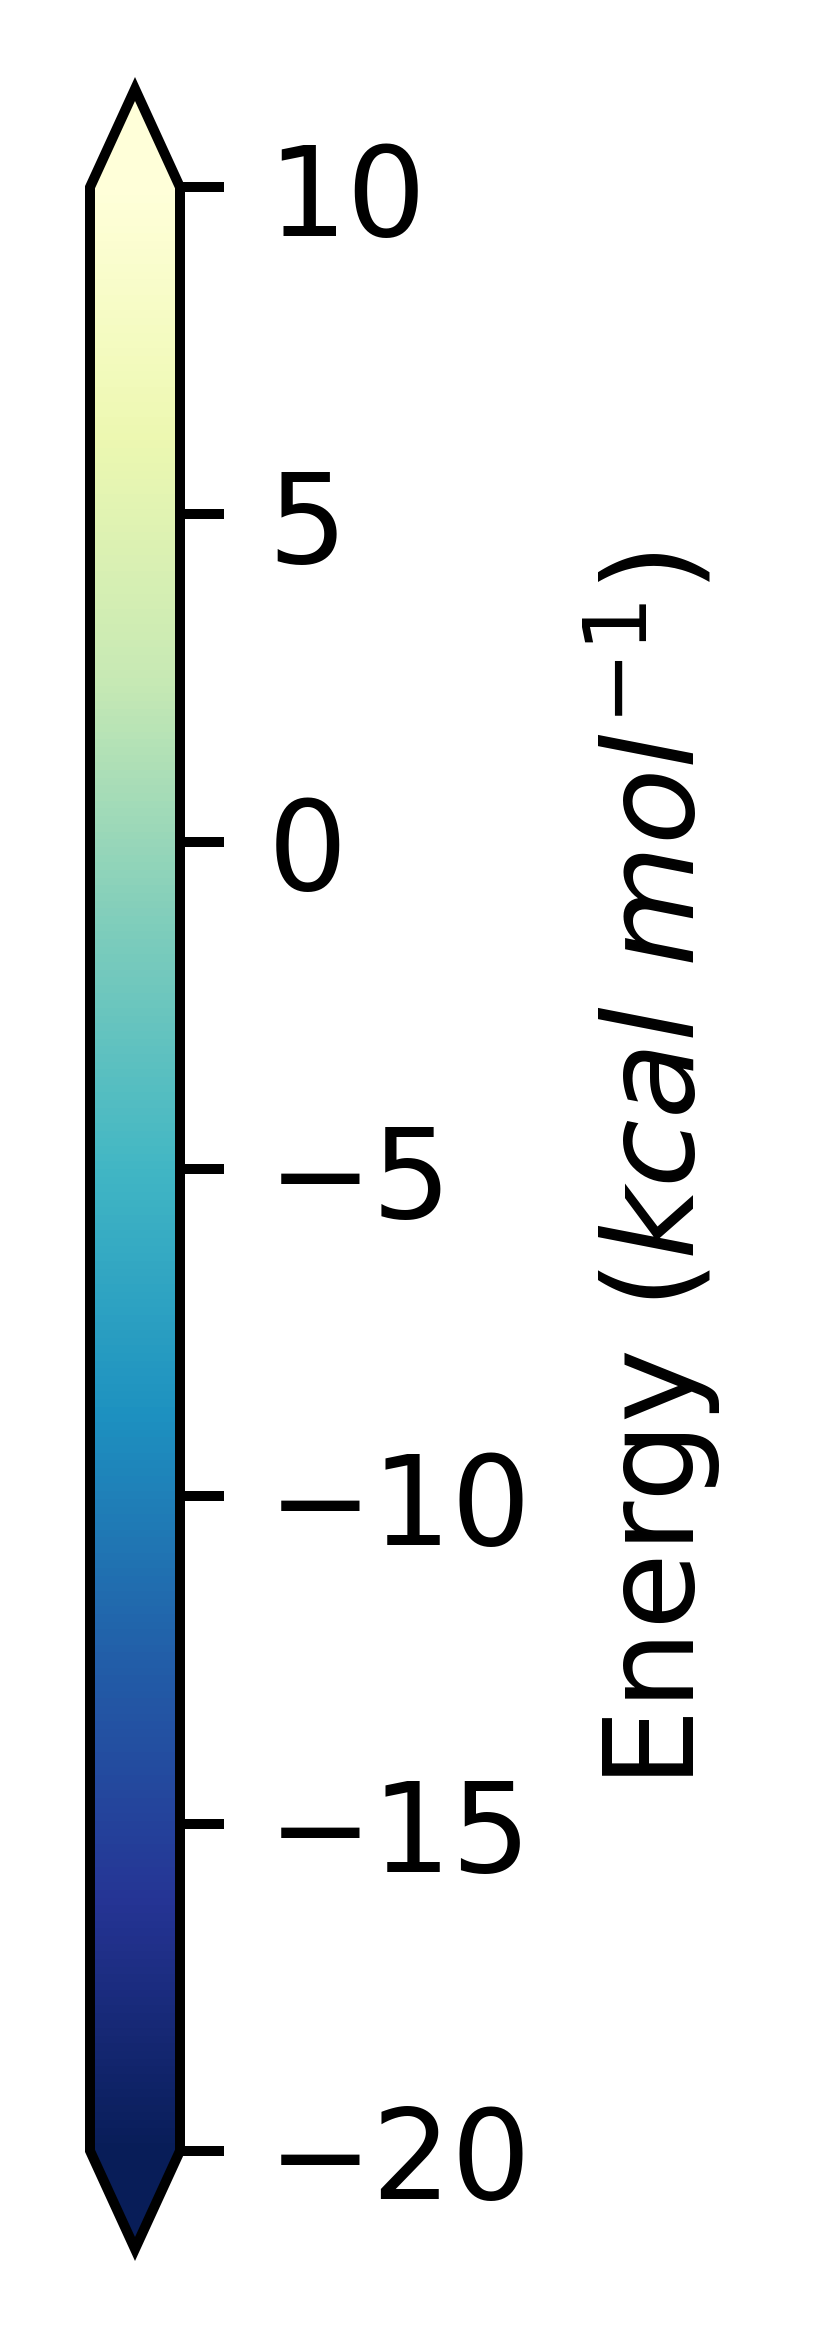

In [7]:
import matplotlib

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,4), dpi=900)
plt.subplots_adjust(left=1./5., right=1.5/5., top=3.4/4., bottom=1./4.)

norm = matplotlib.colors.Normalize(-20, 10)

cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=sns.color_palette("YlGnBu_r", as_cmap=True)), cax=ax, extend='both', label=r'Energy ($kcal\ mol^{-1}$)')

fig.savefig(f'{basedir}/../cbar_pes.jpeg')